<a href="https://colab.research.google.com/github/RNMR/Trabajo-Final-AA-2023-1/blob/main/Trabajo_acad%C3%A9mico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Carga del dataset


In [1]:
# Descarga y lectura del dataset
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

In [2]:
# Importamos librerias
import numpy as np # linear algebra
import pandas as pd # data processing,

# Librerías para la visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import rcParams

# Librerías para entrenar al modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# Importamos 'scikit_learn' para 'k-fold cross validation'
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
# Agrupamos los nombres de las columnas de nuestro dataset para su posterior lectura
columns = ['Age','Work Class','Final Weight','Education','Education Number','Marital Status','Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss','Hours per Week','Country','Income']

In [4]:
# El método "read_csv" nos permite leer un excel
adultData = pd.read_csv(url1, header=None, names=columns)
adultTest = pd.read_csv(url2, skiprows=1, header=None, names=columns)
df = adultData.append(adultTest)

<ipython-input-4-7d863d1ac90e>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = adultData.append(adultTest)


##Análisis y preprocesamiento de datos

In [5]:
# Limpiamos la columna Income
df.Income = df.Income.replace('\.', '', regex=True)

In [6]:
# Antes de analizar la data, convertimos la columna objetiva en valores numéricos utilizando Label Encoder
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df['Income'] = labelEncoder.fit_transform(df['Income'])

print("Para la columna 'Income', la codificación fue: {}".format(dict(enumerate(labelEncoder.classes_))))

Para la columna 'Income', la codificación fue: {0: ' <=50K', 1: ' >50K'}


In [7]:
# Verificamos si hay valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               48842 non-null  int64 
 1   Work Class        48842 non-null  object
 2   Final Weight      48842 non-null  int64 
 3   Education         48842 non-null  object
 4   Education Number  48842 non-null  int64 
 5   Marital Status    48842 non-null  object
 6   Occupation        48842 non-null  object
 7   Relationship      48842 non-null  object
 8   Race              48842 non-null  object
 9   Sex               48842 non-null  object
 10  Capital Gain      48842 non-null  int64 
 11  Capital Loss      48842 non-null  int64 
 12  Hours per Week    48842 non-null  int64 
 13  Country           48842 non-null  object
 14  Income            48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


In [8]:
# Eliminamos valores duplicados
df.drop_duplicates(keep = "first", inplace = True)
df.shape

(48790, 15)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Final Weight'}>],
       [<Axes: title={'center': 'Education Number'}>,
        <Axes: title={'center': 'Capital Gain'}>],
       [<Axes: title={'center': 'Capital Loss'}>,
        <Axes: title={'center': 'Hours per Week'}>]], dtype=object)

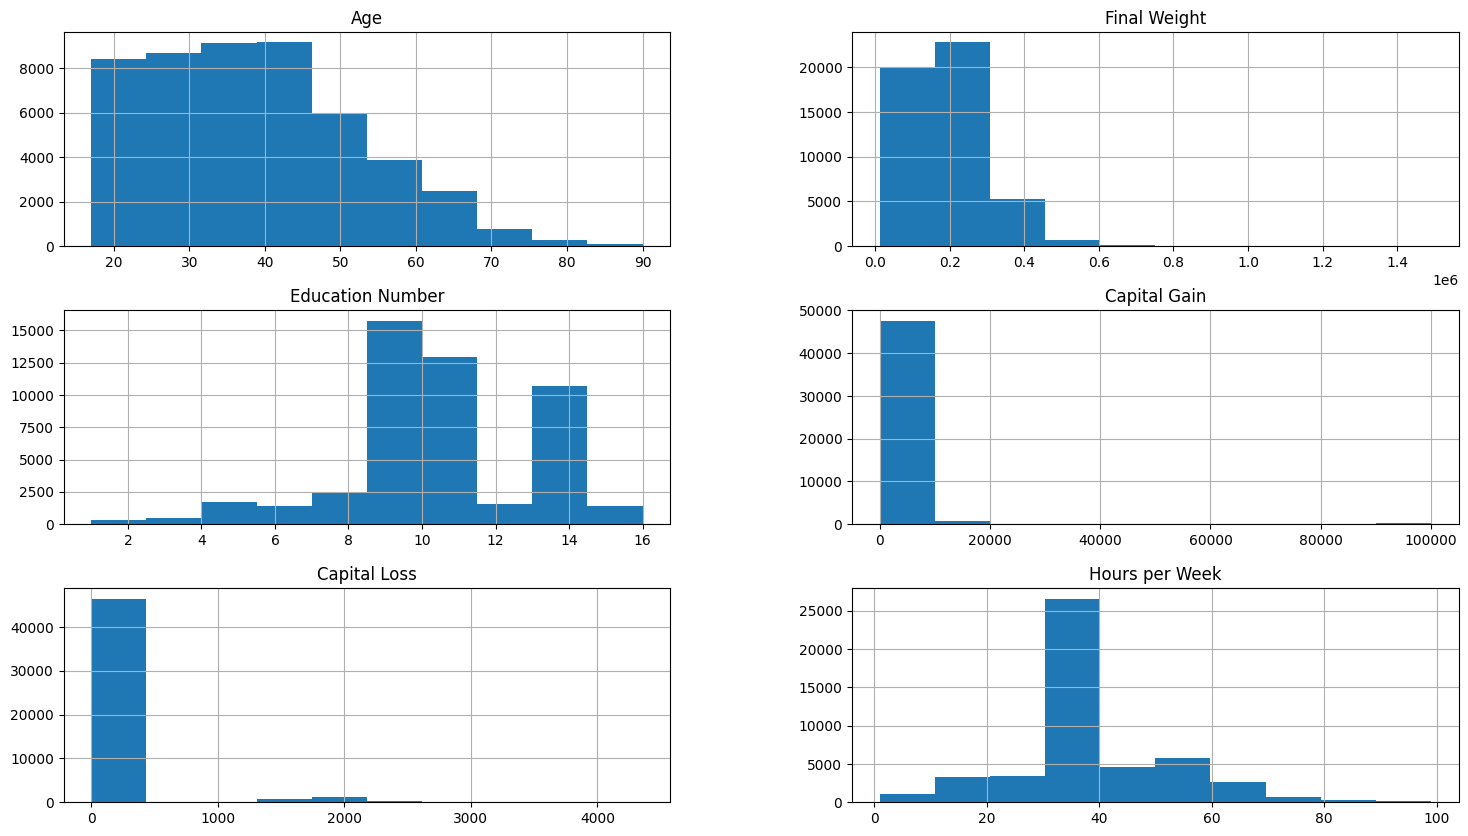

In [9]:
# Visualización de los "features" categóricos
rcParams['figure.figsize'] = 18, 10
df[['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']].hist()

<ipython-input-10-7074db7635ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())
<ipython-input-10-7074db7635ac>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45)
<ipython-input-10-7074db7635ac>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values)
<ipython-input-10-7074db7635ac>:6: FutureWarning: The de

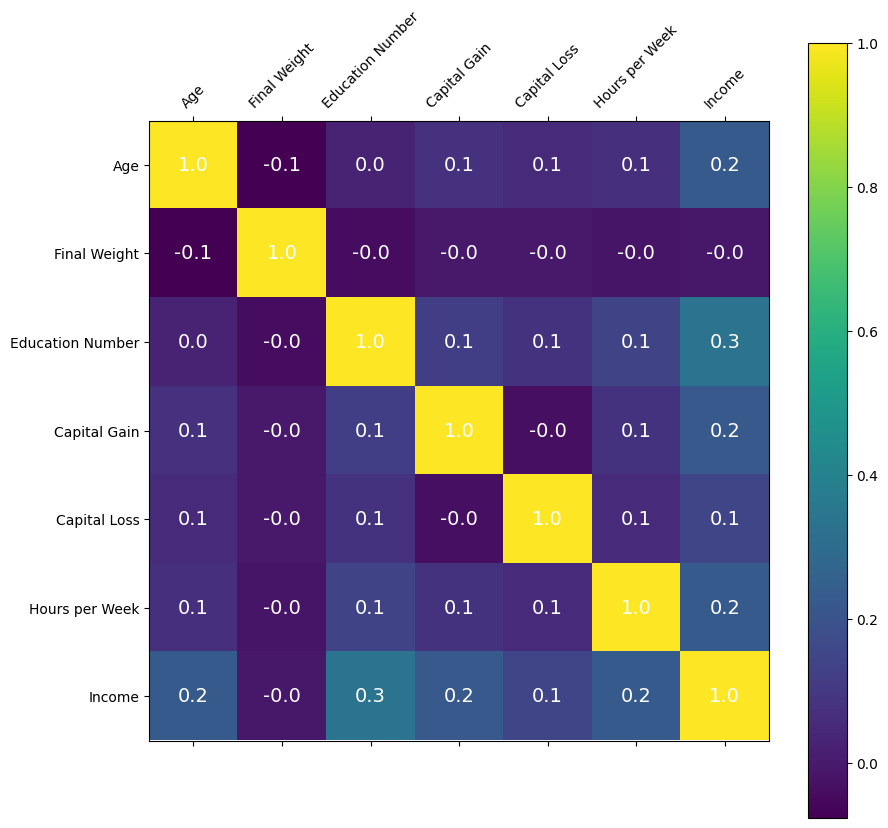

In [10]:
#  Utilizamos la matriz de correlación para identificar la relación de nuestros "features" continuos con nuestro valor objetivo Income
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45)
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values)
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [11]:
# Personas que pueden ganar más de $50K, según su edad
df['Age'] = pd.cut(df['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<Axes: xlabel='Age', ylabel='count'>

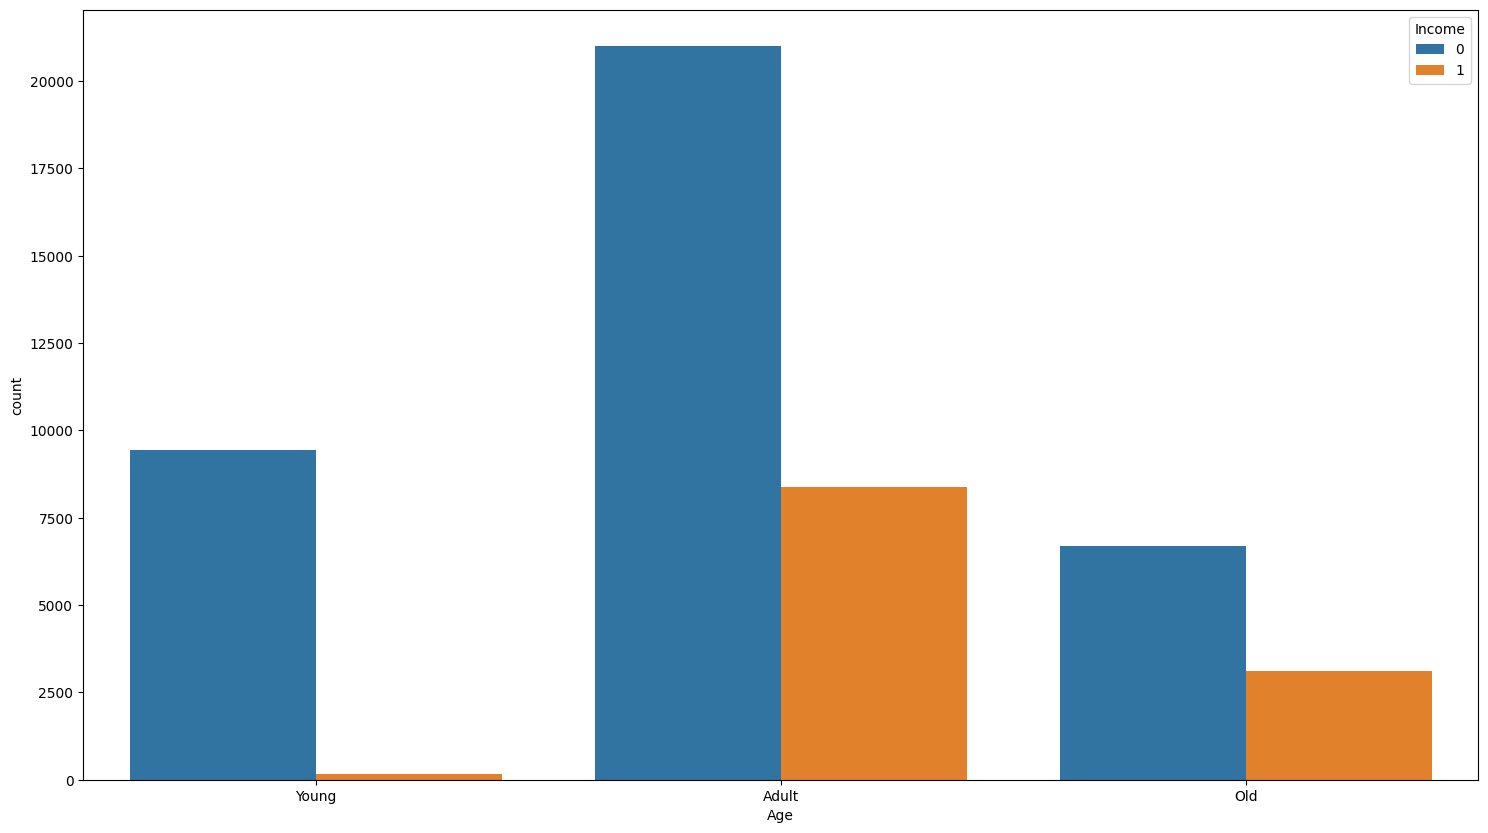

In [12]:
sns.countplot(x = 'Age', hue = 'Income', data = df)

In [13]:
df

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Country,Income
0,Adult,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,Adult,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,Adult,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,Old,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,Adult,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,Adult,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,Old,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
16278,Adult,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,Adult,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [14]:
# Usaremos la diferencia de Ganancia Capital y Pérdida Capital
df['Capital Diff'] = df['Capital Gain'] - df['Capital Loss']
df.drop(['Capital Gain'], axis = 1, inplace = True)
df.drop(['Capital Loss'], axis = 1, inplace = True)

<Axes: xlabel='Capital Diff', ylabel='count'>

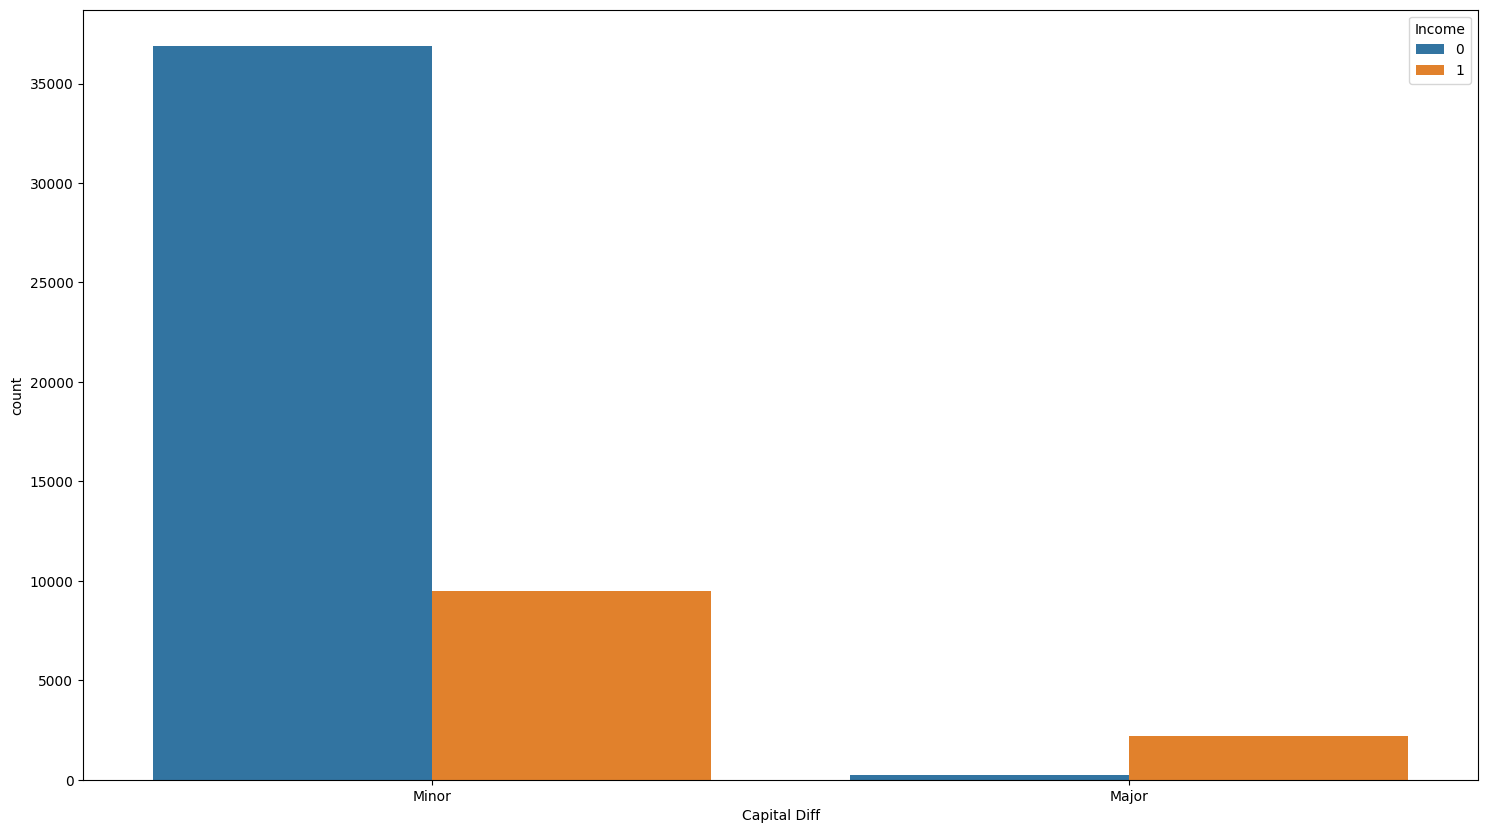

In [15]:
df['Capital Diff'] = pd.cut(df['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Capital Diff', hue = 'Income', data = df)

In [16]:
# Eliminamos la columna 'Final Weight' porque no existe alguna relación con la matrix de correlación
df.drop(['Final Weight'], axis = 1, inplace = True)

In [17]:
# Análisis de las horas que trabajan en el trabajo
df['Hours per Week'] = pd.cut(df['Hours per Week'], bins = [0, 30, 40, 100], labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<Axes: xlabel='Hours per Week', ylabel='count'>

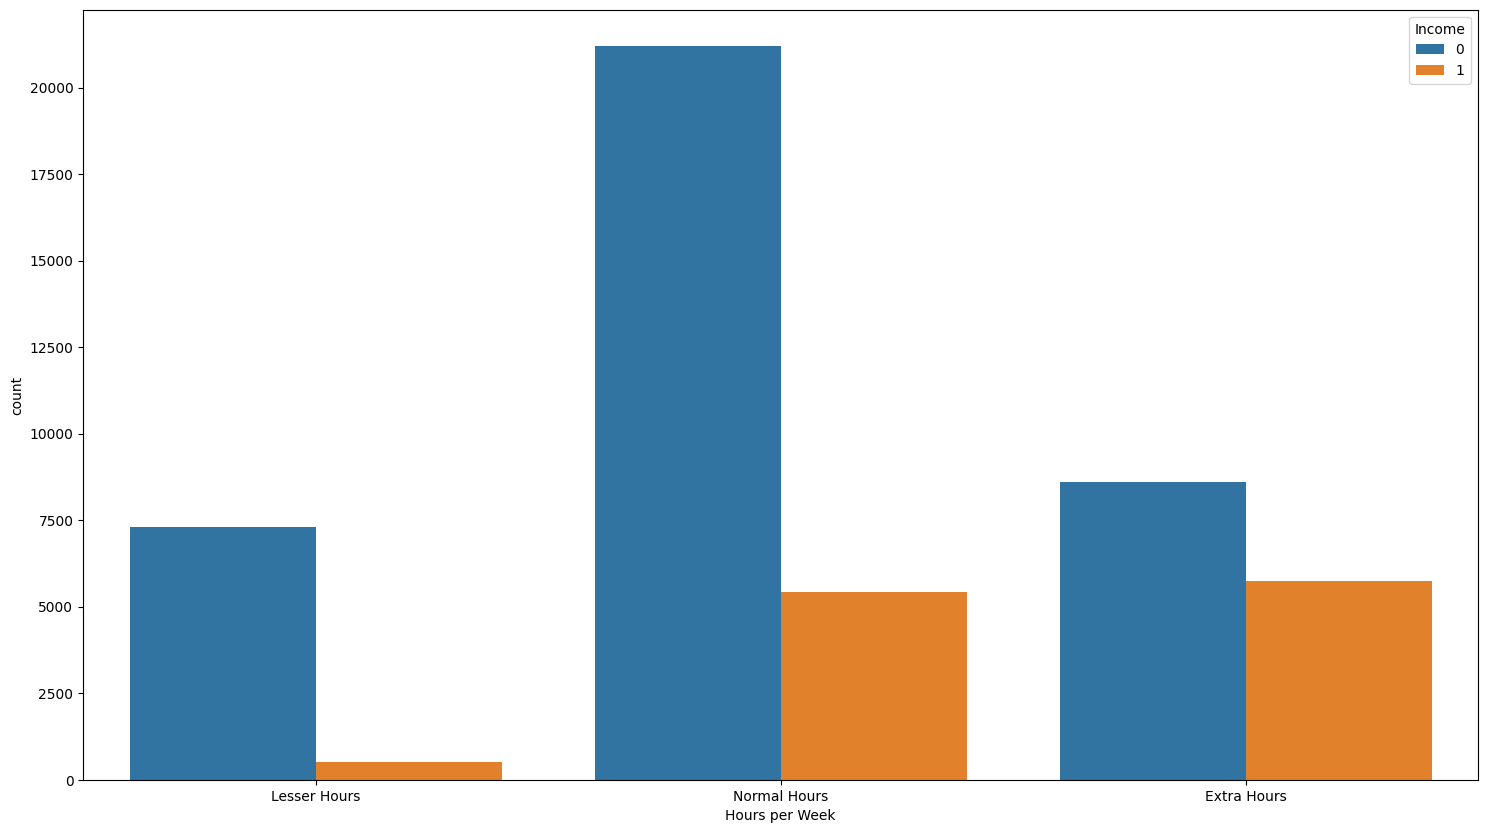

In [18]:
sns.countplot(x = 'Hours per Week', hue = 'Income', data = df)

<Axes: xlabel='Work Class', ylabel='count'>

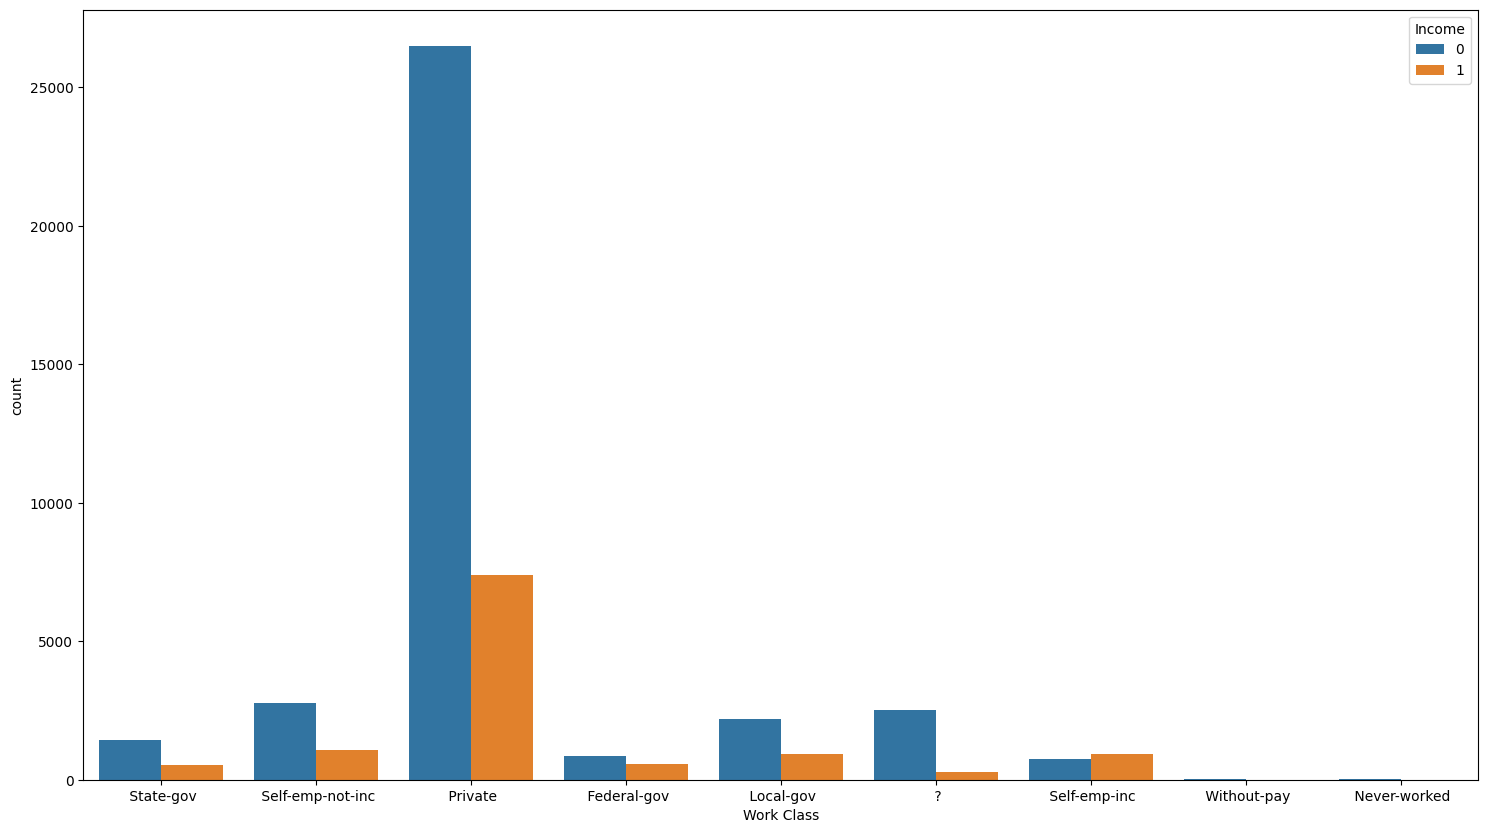

In [19]:
# Análisis de los 'Work Class'
sns.countplot(x = 'Work Class', hue = 'Income', data = df)

In [20]:
# Eliminamos los datos erróneos y los que no aportan información
df = df.drop(df[df['Work Class'] == ' ?'].index)
df = df.drop(df[df['Work Class'] == ' Without-pay'].index)
df = df.drop(df[df['Work Class'] == ' Never-worked'].index)

<Axes: xlabel='Education', ylabel='count'>

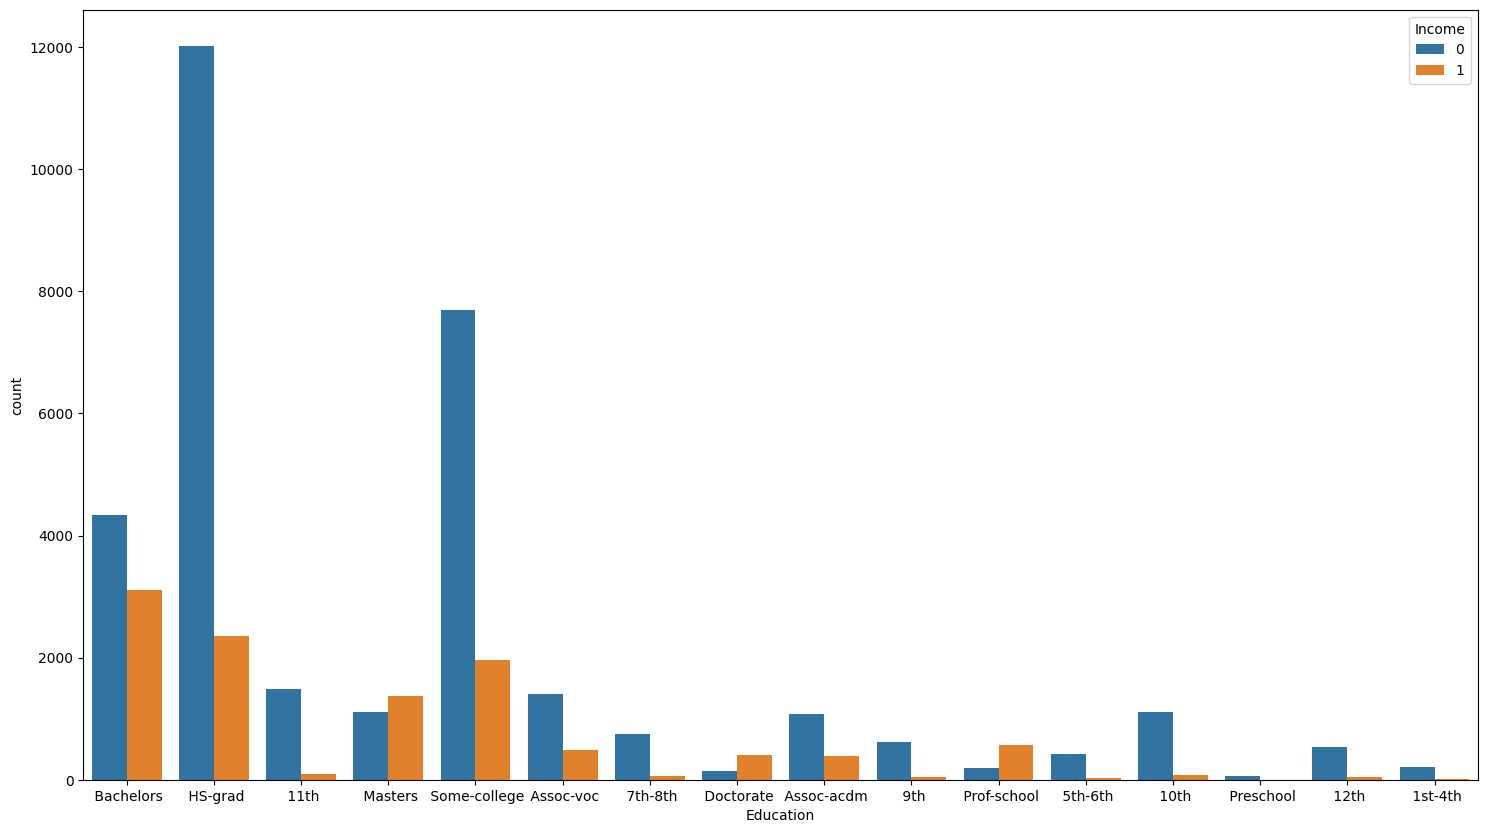

In [21]:
sns.countplot(x = 'Education', hue = 'Income', data = df)

In [22]:
# Relación entre 'Education Number' y 'Education'
education_classes = df['Education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, df[df['Education'] == edu_class]['Education Number'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  Some-college, the Education Number is [10]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Assoc-acdm, the Education Number is [12]
For  9th, the Education Number is [5]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]
For  1st-4th, the Education Number is [2]


In [23]:
# Eliminamos 'Education Number' porque tiene el mismo significado que 'Education'
df.drop(['Education Number'], axis = 1, inplace = True)
df['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'], ' School', inplace = True)
df['Education'].value_counts()

 HS-grad         14362
 Some-college     9659
 Bachelors        7450
 School           5544
 Masters          2486
 Assoc-voc        1891
 Assoc-acdm       1464
 Prof-school       765
 Doctorate         553
Name: Education, dtype: int64

In [24]:
df['Marital Status'].value_counts()

 Married-civ-spouse       20620
 Never-married            14245
 Divorced                  6121
 Separated                 1362
 Widowed                   1236
 Married-spouse-absent      558
 Married-AF-spouse           32
Name: Marital Status, dtype: int64

In [25]:
df['Relationship'].value_counts()

 Husband           18260
 Not-in-family     11406
 Own-child          6421
 Unmarried          4662
 Wife               2069
 Other-relative     1356
Name: Relationship, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

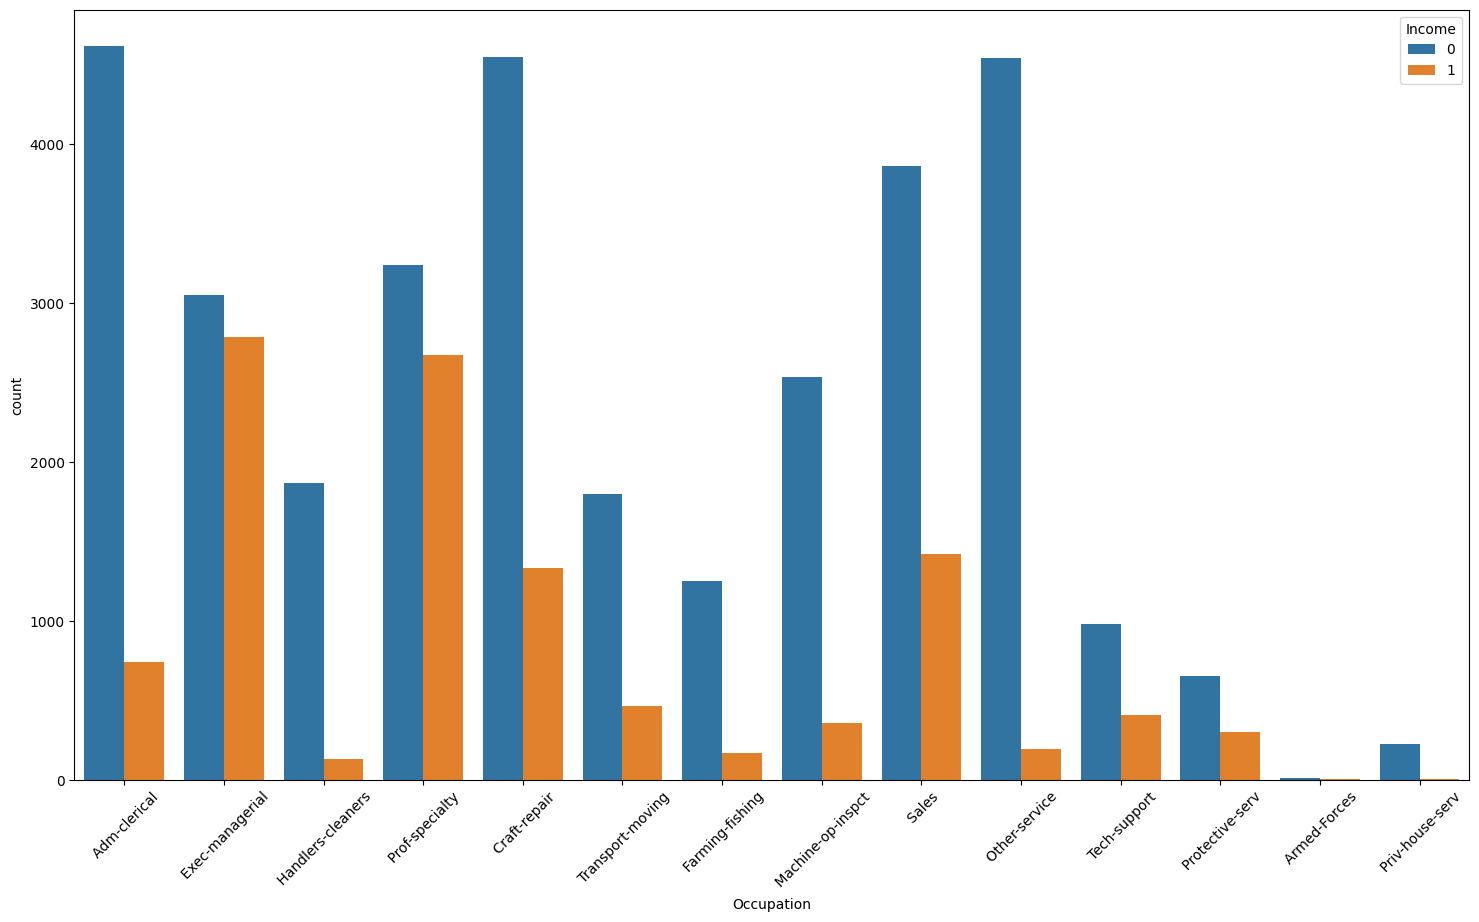

In [26]:
# Gráfica de 'Ocupation'
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = df)

<Axes: xlabel='Race', ylabel='count'>

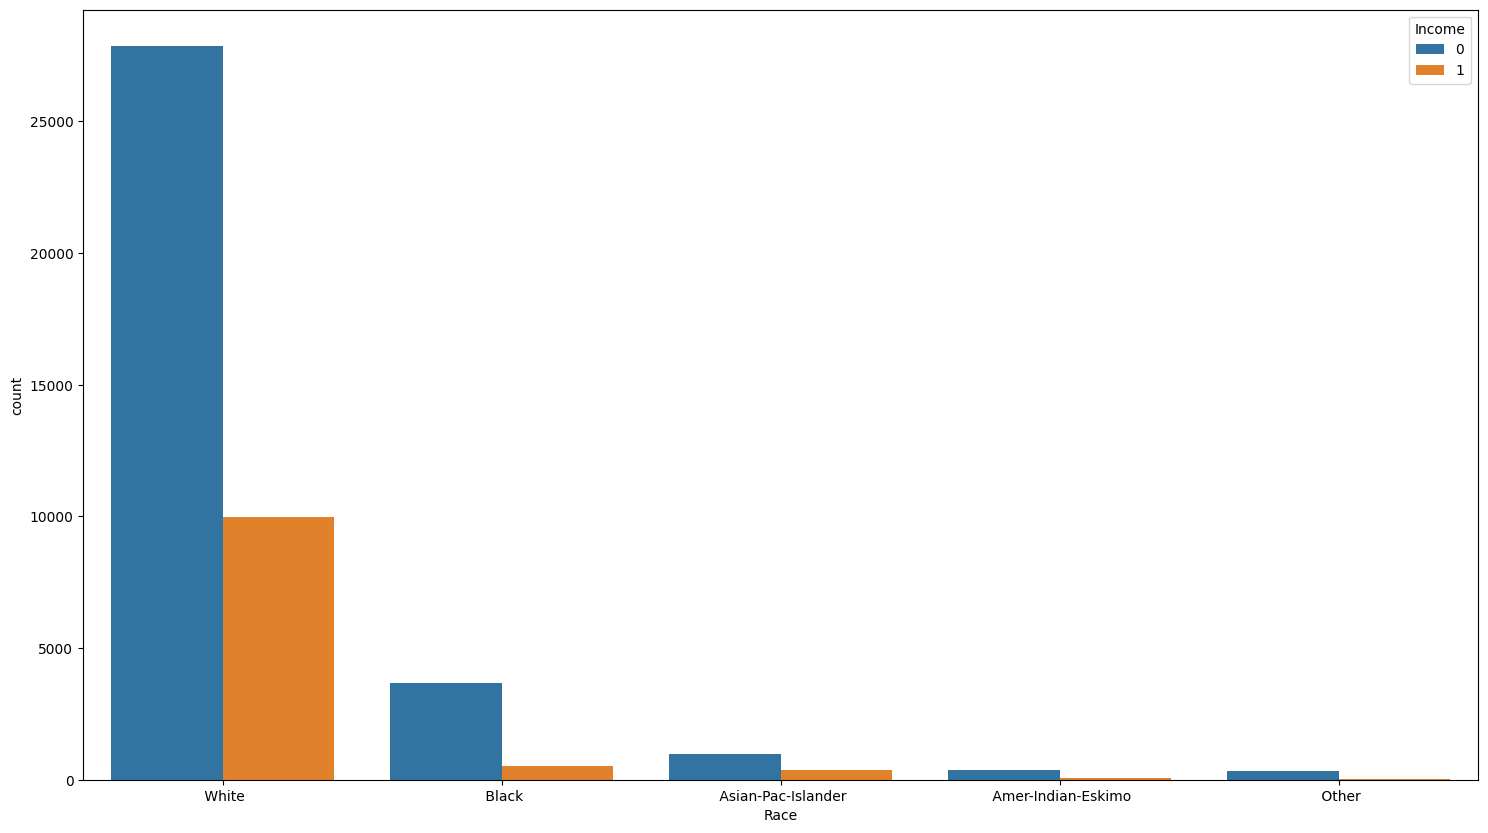

In [27]:
# Análisis respecto al parámetro 'Race'
sns.countplot(x = 'Race', hue = 'Income', data = df)

In [28]:
# Conbinamos la data de 'Asian-Pac-Islander' y 'Amer-Indian-Eskimo' en 'Other'
df['Race'].unique()
df['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

<Axes: xlabel='Sex', ylabel='count'>

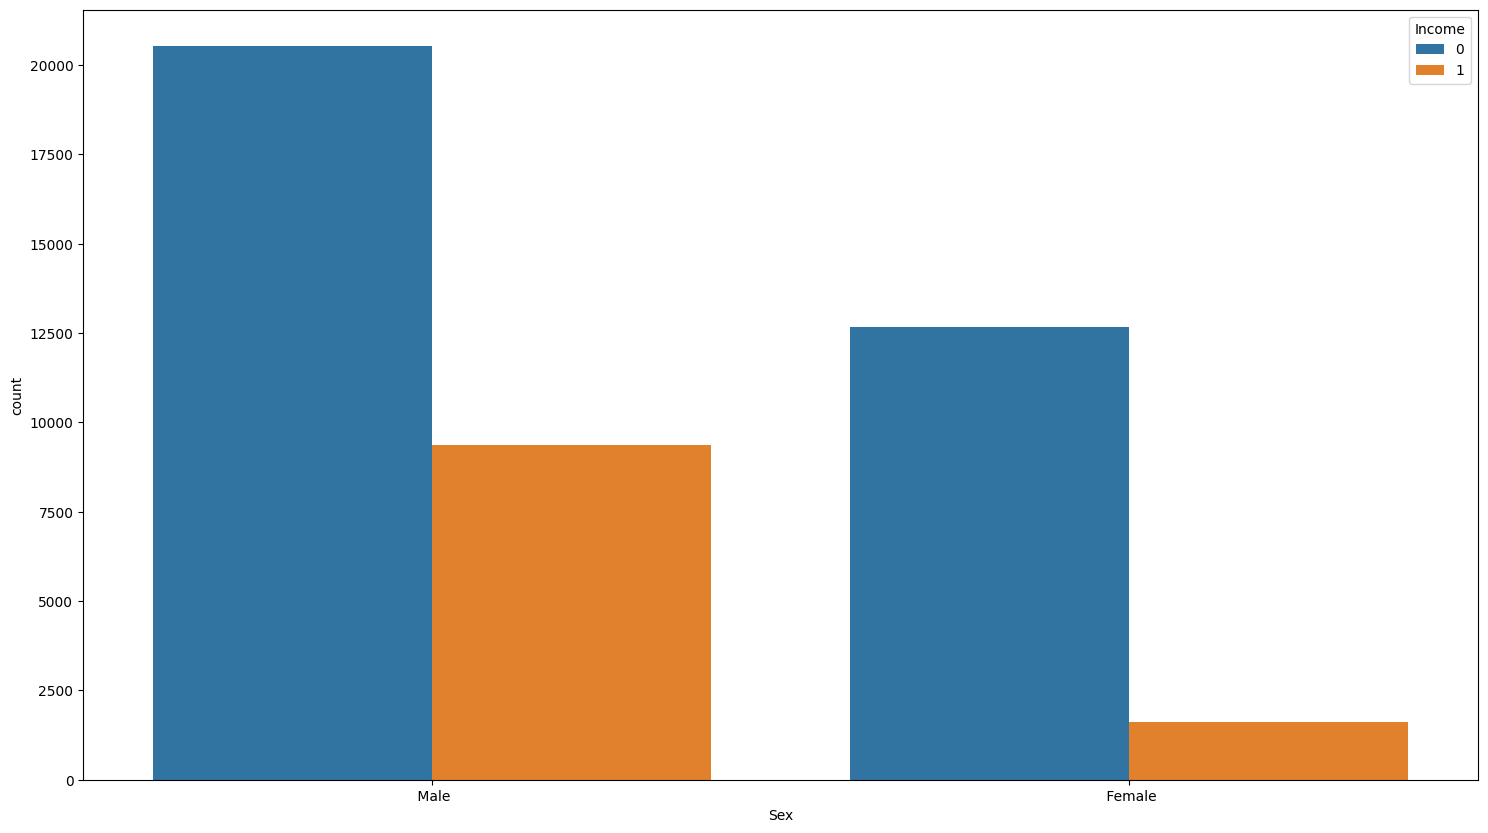

In [29]:
# Gráfica respecto a 'Sex'
sns.countplot(x = 'Sex', hue = 'Income', data = df)

In [30]:
# Análisis de 'Country'
country_count = df['Country'].value_counts()
country_count

 United-States                 39622
 Mexico                          866
 ?                               782
 Philippines                     267
 Germany                         180
 Puerto-Rico                     164
 Canada                          159
 India                           141
 El-Salvador                     141
 Cuba                            129
 England                         113
 China                           111
 Jamaica                         100
 South                            99
 Italy                            94
 Dominican-Republic               92
 Japan                            87
 Vietnam                          82
 Guatemala                        82
 Columbia                         78
 Poland                           77
 Haiti                            66
 Portugal                         59
 Iran                             55
 Taiwan                           54
 Nicaragua                        47
 Greece                           46
 

Text(0.5, 1.0, 'Total adults from each Country')

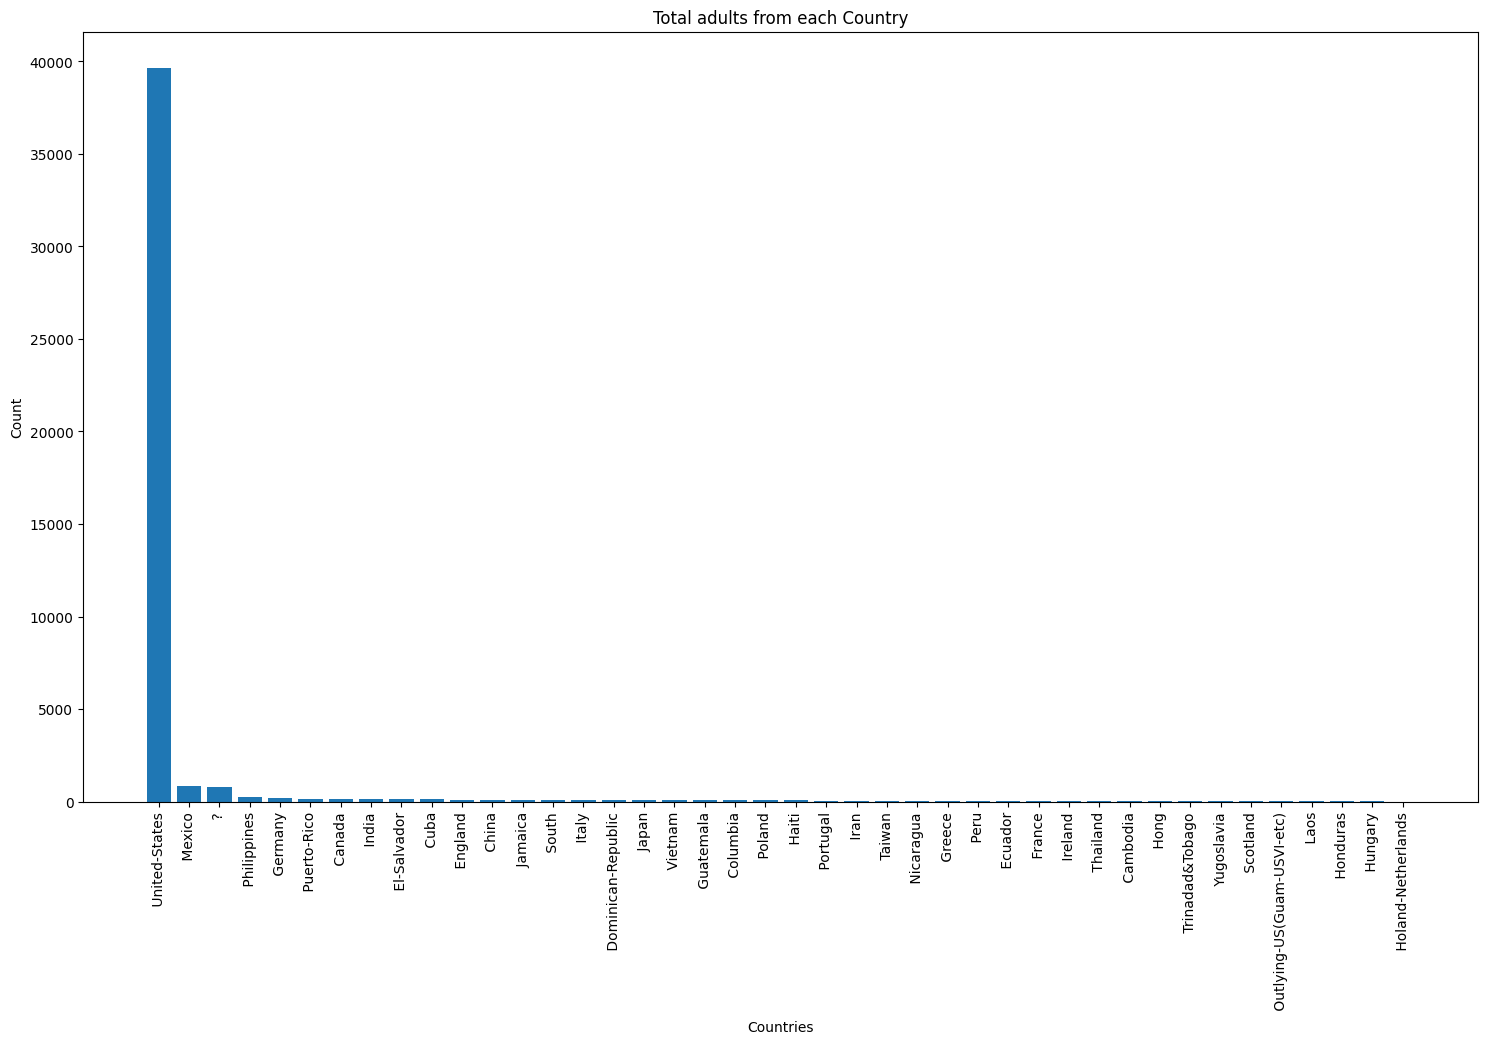

In [31]:
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

<Axes: xlabel='count', ylabel='Country'>

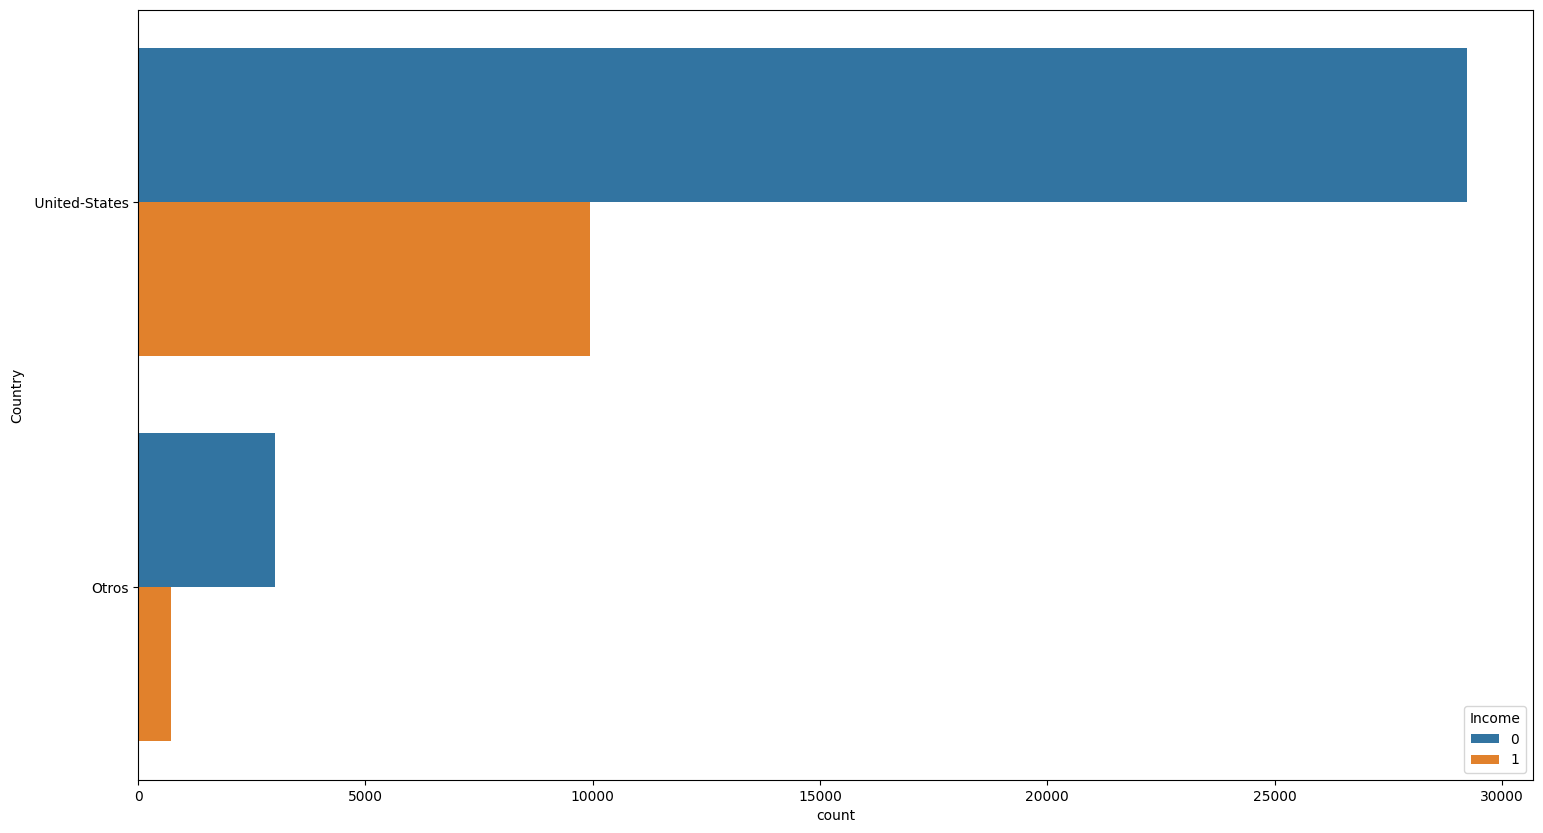

In [32]:
# Distribuimos la data en 'United States' y 'Otros'
df = df.drop(df[df['Country'] == ' ?'].index)

countries = np.array(df['Country'].unique())
countries = np.delete(countries, 0)

df['Country'].replace(countries, 'Otros', inplace = True)

sns.countplot(y = 'Country', hue = 'Income', data = df)

In [33]:
# Manipulación de la data
y = df['Income']
X = df.drop(['Income'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

Total features: 56


##Aplicando Maching Learning


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

###Random Forest Classifier

In [35]:
rfcl = RandomForestClassifier()
rfcl.fit(X_train, y_train)

rfc_predict = rfcl.predict(X_test)

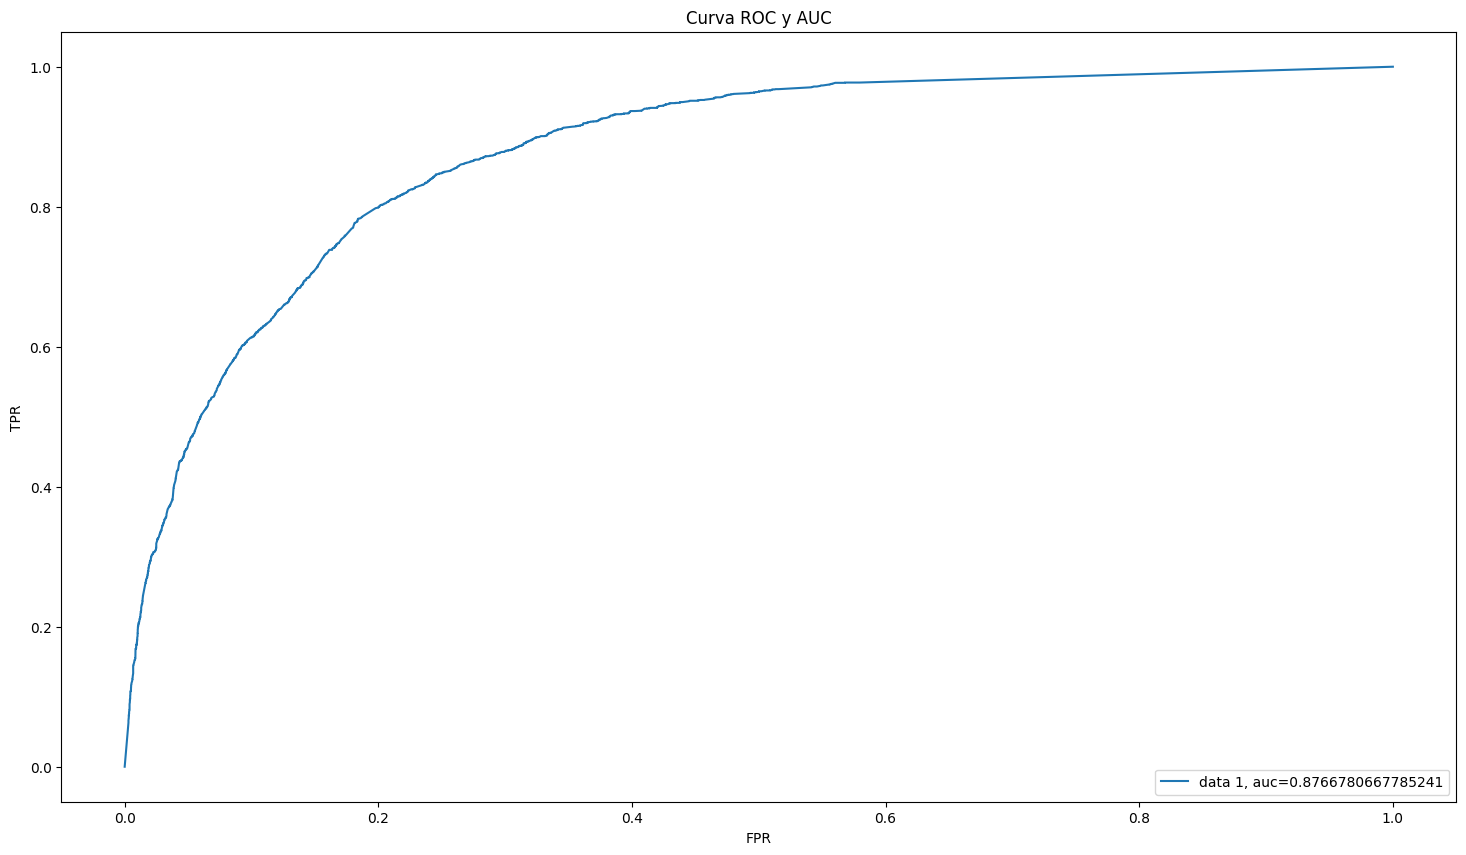

In [36]:
y1_pred_proba = rfcl.predict_proba(X_test)[::,1]
fpr, tpr, th = roc_curve(y_test,  y1_pred_proba)
auc = roc_auc_score(y_test, y1_pred_proba)
plt.title("Curva ROC y AUC")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)
plt.show()

In [37]:
#Aplicando Cross-Validation
rfc_cv_score = cross_val_score(rfcl, X, y, cv=10, scoring="roc_auc")

KeyboardInterrupt: ignored

In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

----

In [ ]:
y_train.head()

-----

(esto no compilar)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Número de arboles en Random Forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Número de 'features' en cada 'split'
max_features = ["auto", "sqrt"]
# Máxima profundidad
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# Creación del 'Random Grid'
random_grid = {
 "n_estimators": n_estimators,
 "max_features": max_features,
 "max_depth": max_depth
 }
# Búsqueda de los parámetros aleatorios
rfcl_random = RandomizedSearchCV(estimator = rfcl,
  param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2,
  random_state=42, n_jobs = -1)
# Entrenamiento del modelo
rfcl_random.fit(X_train, y_train)
# Imprimimos los resultados
print(rfcl_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: ignored

-- HORA DE ENTRENAR MODELOS -- (reanudar)


**Random Forest**

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [39]:
# RANDOM FOREST
m = RandomForestClassifier(n_estimators=15, n_jobs=-1)
m.fit(X_train, y_train)

print(f'Scores:')
print(f'Train      = {m.score(X_train, y_train):.4}')
print(f'Validation = {m.score(X_test, y_test):.4}') # VAL



Scores:
Train      = 0.8915
Validation = 0.8305


Stackeando modelos

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

(15, 10724)


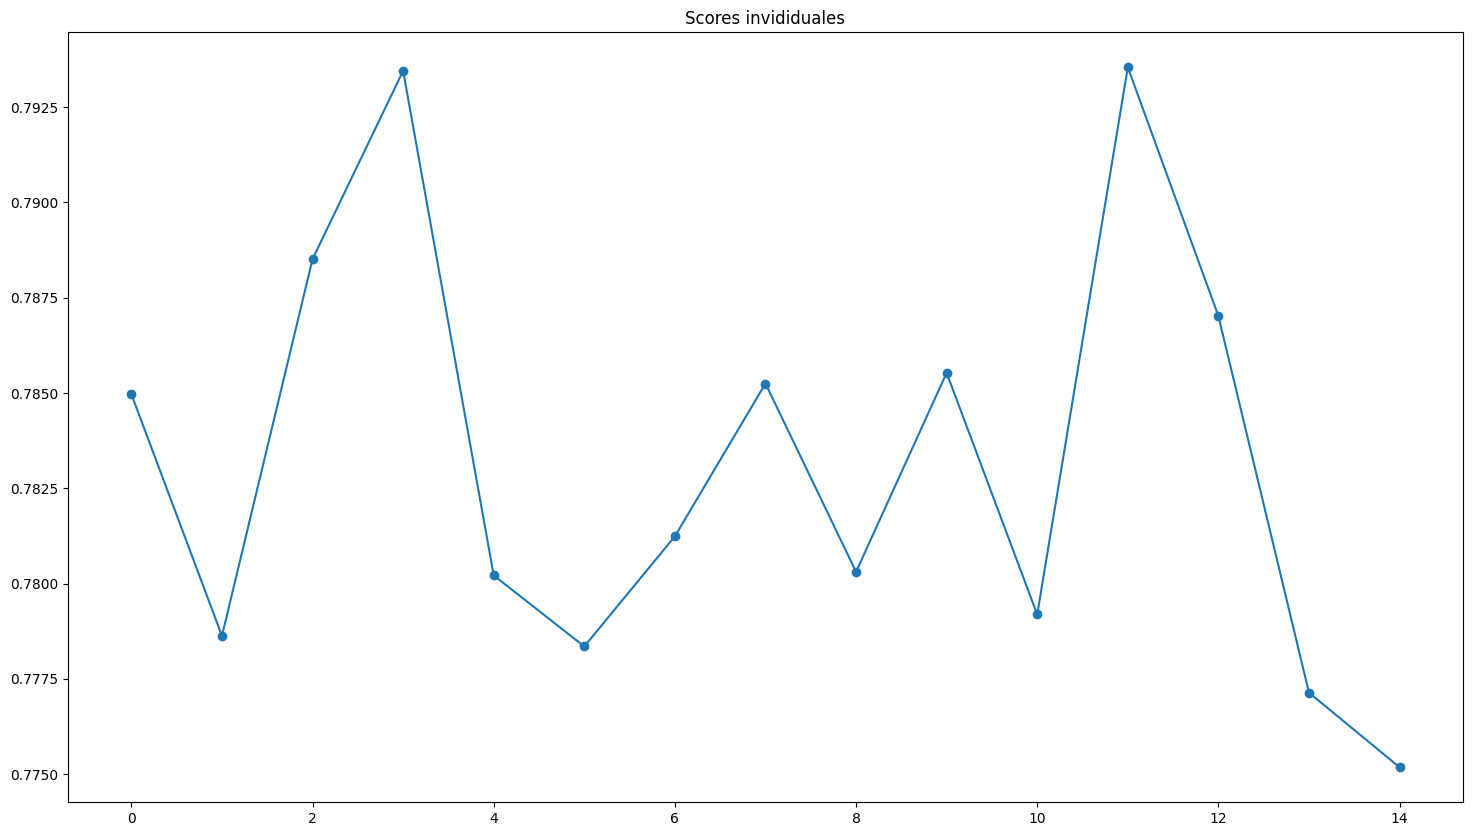

In [50]:
preds = np.stack([t.predict(X_test) for t in m.estimators_])
print(preds.shape)
preds

# Veamos el score de cada árbol

from sklearn.metrics import accuracy_score

accs = [accuracy_score(y_test==' >50K', p) for p in preds]
plt.plot(accs, '-o')
plt.title('Scores invididuales');

Score acumulado

In [ ]:
acum_accs = [accuracy_score(y_test==' >50K', np.mean(preds[:i+1,:], axis=0) > 0.5) for i in range(len(preds))]
plt.plot(acum_accs, '-o')
plt.title('Scores acumulados');

BAGGING CON RANDOM FOREST

In [40]:
rf = RandomForestClassifier(oob_score = True)
rf.fit(X_train, y_train)

print('Exactitud del modelo inicial en entrenamiento:', rf.score(X_train, y_train))
print('Exactitud del modelo inicial en entrenamiento (Out of Bag):', rf.oob_score_)
print('Exactitud del modelo inicial en validación:', rf.score(X_test, y_test))

Exactitud del modelo inicial en entrenamiento: 0.8931024836032452
Exactitud del modelo inicial en entrenamiento (Out of Bag): 0.8403531130521277
Exactitud del modelo inicial en validación: 0.8315926892950392


GRID SEARCH

In [47]:
max_features = [11, 12, 13]
max_depth = [32, 35, 38]
min_samples_leaf = [4]
n_estimators = [200]

segundo_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

In [48]:
rf = RandomForestClassifier(oob_score = True)
rf_grid = GridSearchCV(estimator = rf,
                        param_grid = segundo_grid,
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2,
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': [32, 35, 38],
                         'max_features': [11, 12, 13], 'min_samples_leaf': [4],
                         'n_estimators': [200]},
             verbose=2)

<ipython-input-49-0b96ca93d585>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_names[sorted_idx])


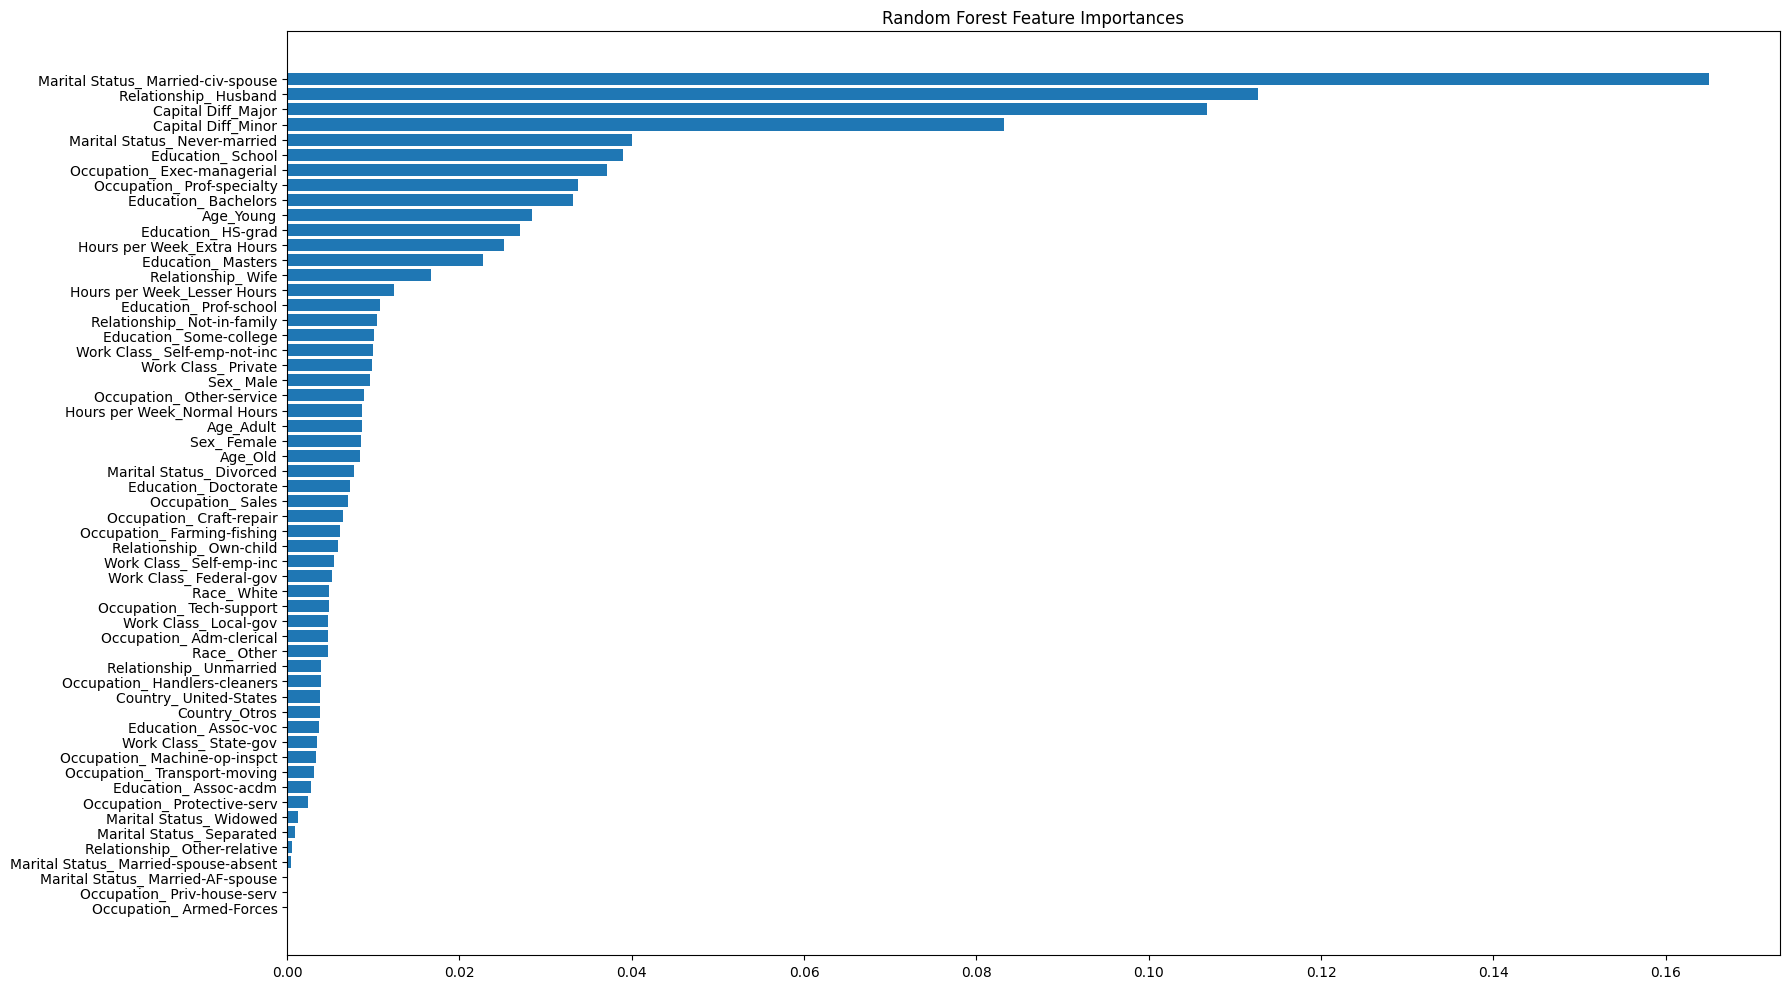

In [49]:
rf_grid_best = rf_grid.best_estimator_

feature_names = X_train.columns.values
tree_feature_importances = rf_grid_best.feature_importances_
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
plt.show()

---

Ensamble con Decision Tree Classifier & SVC

In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


Ensamblando los 3 modelos: DecisionTree, KN y SVC

In [1]:
estimators = [
#     ('SVM de kernel gaussiano', make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True)) ),
     ('árbol de decisión', DecisionTreeClassifier(max_depth=10)),
     ('k-NN', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=15) )),
] # SVC da error no se xq

ensamble = VotingClassifier(estimators=estimators,
                        voting='soft', weights=[3, 1])

for (name, estimator) in estimators:
  estimator.fit(X_train, y_train)
  print(f'Exactitud de {name: <25}: Entrenamiento {estimator.score(X_train, y_train):.03f} || Validación {estimator.score(X_test, y_test):.03f}',  )



NameError: ignored

In [45]:
ensamble.fit(X_train, y_train)
print(f'Exactitud de {"ensamble": <25}: Entrenamiento {ensamble.score(X_train, y_train):.03f} || Validación {ensamble.score(X_test, y_test):.03f}' )

Exactitud de ensamble                 : Entrenamiento 0.859 || Validación 0.837


----